In [315]:
library('tidyverse')
library('gapminder')
library('ggrepel')
library('patchwork')

Recreate this figure as best you can using the techniques we have learned:

![](02_example.png)

Work with the gapminder dataset. The following will give you four tables.
1. A table for 1952 data.
1. A table for 2002 data.
1. A table for just Kuwait in 1952. 
1. A table for just Kuwait in 2002. 

In [316]:
df.1952 = gapminder %>% filter(year == 1952)
df.2002 = gapminder %>% filter(year == 2002)
df.1952.kuwait = df.1952 %>% filter(country == 'Kuwait') 
df.2002.kuwait = df.2002 %>% filter(country == 'Kuwait') 

In [317]:
gapminder%>% head

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


Plan A

In [318]:
? geom_text_repel


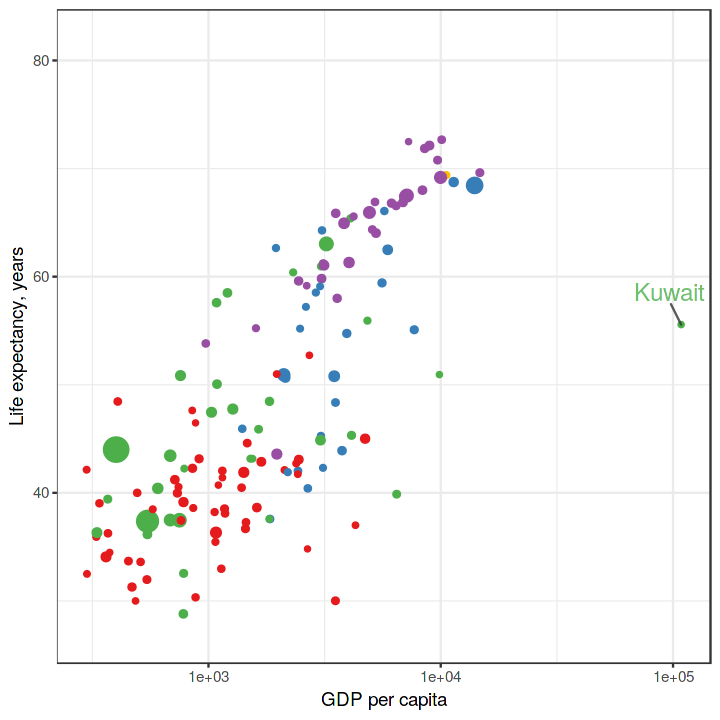

In [321]:
p = ggplot(df.1952, aes(x = gdpPercap , y = lifeExp, color = continent,size = pop))

p = p + geom_point()

options(repr.plot.width=6, repr.plot.height=6)


 p = p + geom_text_repel(data = df.1952.kuwait,
                        segment.color = 'grey20',
                        segment.size = 0.5,
                        alpha = 0.8,
                        nudge_x = 1,
                        nudge_y = 3,
                        aes(x = gdpPercap, y = lifeExp, label = country),
                        size = 5)
p = p + scale_size(breaks = seq(1e+5, 1.5e+9, 3e+8), 
                   limits = c(1e+4, 1.5e+9),
                   range = c(1, 10), labels = scales::comma)

p = p + scale_color_manual(values = c('#e41a1c',
                                      '#377eb8',
                                      '#4daf4a',
                                      '#984ea3',                                 
                                      '#ffbf00'))
p = p + ylim(c(27, 82))
p = p + scale_x_log10()
p = p + theme_bw()

p = p + theme(legend.position = 'none',
              strip.background = element_blank(),
              )

p = p + labs(y = 'Life expectancy, years', x = 'GDP per capita',colour = "Continent",size = "Population",)

p

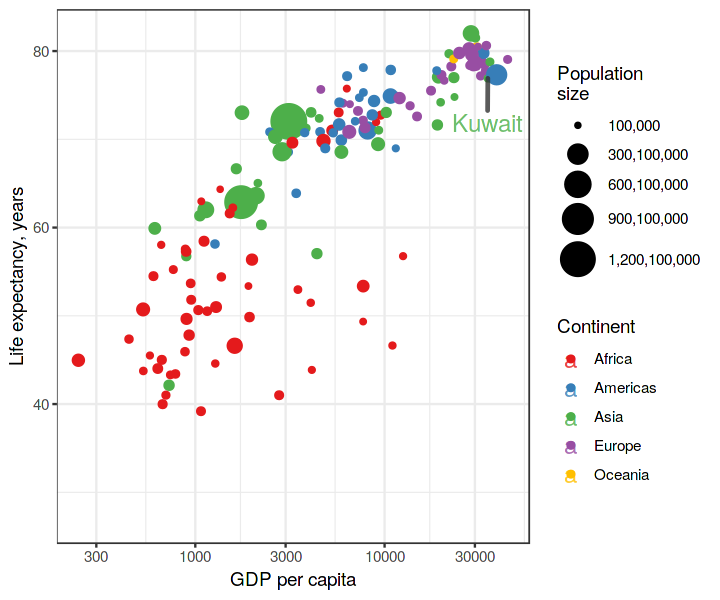

In [313]:
q = ggplot(df.2002, aes(x = gdpPercap , y = lifeExp, color = continent,size = pop))

q = q + geom_point()

options(repr.plot.width=6, repr.plot.height=5)


q = q + geom_text_repel(data = df.2002.kuwait,
                        segment.color = 'grey20',
                        segment.size = 1,
                        alpha = 0.8,
                        aes(x = gdpPercap, y = lifeExp, label = country),
                        nudge_x= 1,
                        nudge_y = -5,
                        size = 5)

q = q + scale_size(breaks = seq(1e+5, 1.5e+9, 3e+8), 
                   limits = c(1e+4, 1.5e+9),
                   range = c(1, 10), labels = scales::comma)

q = q + scale_color_manual(values = c('#e41a1c',
                                      '#377eb8',
                                      '#4daf4a',
                                      '#984ea3',                                 
                                      '#ffbf00'))
q = q + ylim(c(27, 82))
q = q + scale_x_log10()
q = q + theme_bw()

q = q + theme(legend.position = 'right',
              strip.background = element_blank(),
              )

q = q + labs(y = 'Life expectancy, years', x = 'GDP per capita',colour = "Continent", size = "Population
size")

q

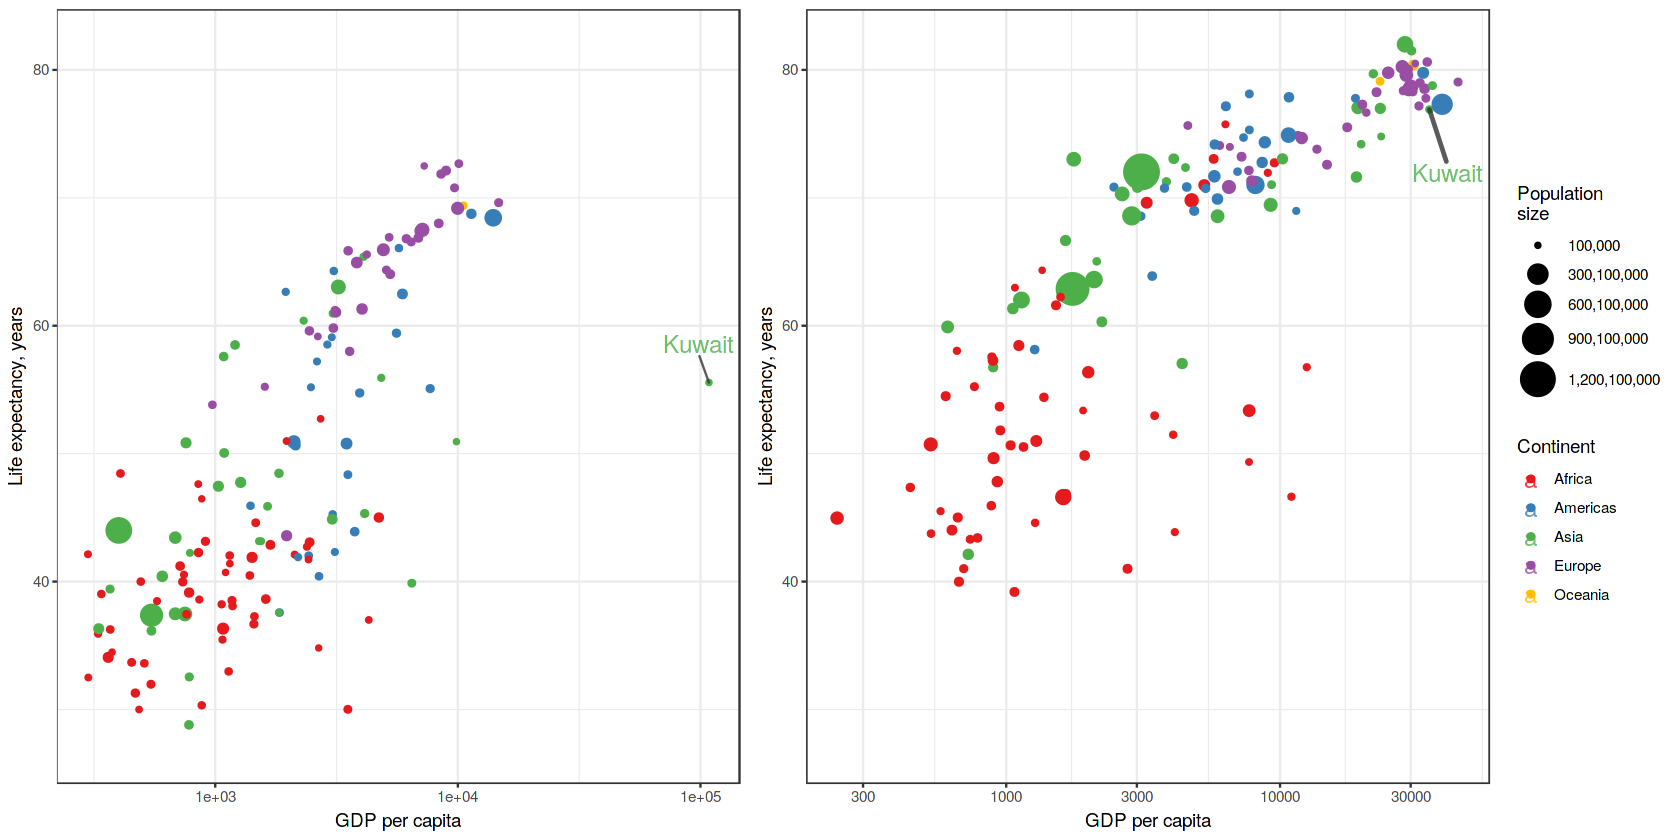

In [314]:

options(repr.plot.width=14, repr.plot.height=7)
p + q

## Hints!

These snippets will help you to get the legends and scales as they're set in the example.

- This is how the size scale is set:

```R
p = p + scale_size(breaks = seq(1e+5, 1.5e+9, 3e+8), 
                   limits = c(1e+4, 1.5e+9),
                   range = c(1, 10), labels = scales::comma)
```  

- This is how the `y-axis` is fixed for each plot:

```R
p = p + ylim(c(27, 82))
```

- This will set the `x-axis` to a log-scale:

```R
p = p + scale_x_log10()
```

- The `annotate` function is useful for adding text to a figure that's not mapped to data. [annotate documentation](https://ggplot2.tidyverse.org/reference/annotate.html). 

- Don't forget about third-party packages like `ggrepel` and `patchwork`!